# Capstone Project - Fruit classification

Link to Original dataset: https://www.kaggle.com/datasets/kshitij192/cars-image-dataset

8 groups of fruits were choosen from the original dataset to create the current dataset.

In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
dirname = os.path.dirname('Data')

In [6]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 48CE-D36B

 Directory of C:\Users\eddye\Documents\ML-ZOOMCAMP\CODE\projects\capstone_one

18/12/2022  13:21    <DIR>          .
17/12/2022  14:53    <DIR>          ..
17/12/2022  15:41    <DIR>          .ipynb_checkpoints
18/12/2022  13:16    <DIR>          Dataset
17/12/2022  15:42                 0 README.md
18/12/2022  13:21           207,022 train.ipynb
               2 File(s)        207,022 bytes
               4 Dir(s)  622,296,592,384 bytes free


In [7]:
os.getcwd()

'C:\\Users\\eddye\\Documents\\ML-ZOOMCAMP\\CODE\\projects\\capstone_one'

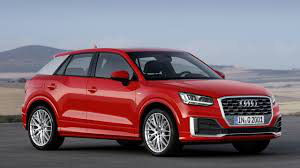

In [8]:
path = 'Dataset/train/Audi'
name = '20.jpg'
fullname = f'{path}/{name}'
fullname

load_img(fullname)

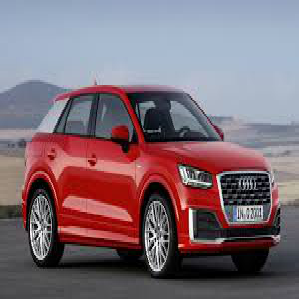

In [9]:
img = load_img(fullname, target_size=(299, 299))
img

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
##PIL python image library
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x1BD3838D400>


In [12]:
np.array(img)

array([[[145, 162, 188],
        [145, 162, 188],
        [145, 162, 188],
        ...,
        [150, 166, 191],
        [150, 166, 191],
        [150, 166, 191]],

       [[145, 162, 188],
        [145, 162, 188],
        [145, 162, 188],
        ...,
        [150, 166, 191],
        [150, 166, 191],
        [150, 166, 191]],

       [[146, 163, 189],
        [146, 163, 189],
        [146, 163, 189],
        ...,
        [150, 166, 191],
        [150, 166, 191],
        [150, 166, 191]],

       ...,

       [[ 72,  72,  74],
        [ 72,  72,  74],
        [ 72,  72,  74],
        ...,
        [ 94,  93,  99],
        [ 94,  93,  99],
        [ 94,  93,  99]],

       [[ 70,  70,  72],
        [ 70,  70,  72],
        [ 70,  70,  72],
        ...,
        [ 88,  87,  93],
        [ 88,  87,  93],
        [ 88,  87,  93]],

       [[ 70,  70,  72],
        [ 70,  70,  72],
        [ 70,  70,  72],
        ...,
        [ 88,  87,  93],
        [ 88,  87,  93],
        [ 88,  87,  93]]

## Transfer Learning

In [13]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
train_ds = train_gen.flow_from_directory(
    'Dataset/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3352 images belonging to 7 classes.


In [16]:
### checking the class indices
train_ds.class_indices

{'Audi': 0,
 'Hyundai Creta': 1,
 'Mahindra Scorpio': 2,
 'Rolls Royce': 3,
 'Swift': 4,
 'Tata Safari': 5,
 'Toyota Innova': 6}

In [17]:
X, y = next(train_ds)

In [18]:
X

array([[[[ 0.5686275 ,  0.62352943,  0.6862745 ],
         [ 0.5686275 ,  0.62352943,  0.6862745 ],
         [ 0.5686275 ,  0.62352943,  0.6862745 ],
         ...,
         [-0.73333335, -0.75686276, -1.        ],
         [-0.42745095, -0.4588235 , -0.6862745 ],
         [-0.7176471 , -0.7490196 , -0.9607843 ]],

        [[ 0.5686275 ,  0.62352943,  0.6862745 ],
         [ 0.5686275 ,  0.62352943,  0.6862745 ],
         [ 0.5686275 ,  0.62352943,  0.6862745 ],
         ...,
         [-0.6313726 , -0.654902  , -0.9137255 ],
         [-0.5294118 , -0.56078434, -0.7882353 ],
         [-0.69411767, -0.7254902 , -0.92156863]],

        [[ 0.56078434,  0.6156863 ,  0.6784314 ],
         [ 0.56078434,  0.6156863 ,  0.6784314 ],
         [ 0.56078434,  0.6156863 ,  0.6784314 ],
         ...,
         [-0.7176471 , -0.7411765 , -1.        ],
         [-0.6862745 , -0.7176471 , -0.94509804],
         [-0.7411765 , -0.77254903, -0.96862745]],

        ...,

        [[ 0.07450986,  0.21568632,  0

In [19]:
y[:3]

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [20]:
## validation set
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'Dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 501 images belonging to 7 classes.


In [21]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

###lAST LINE MEANS DON'T CHANGE Convulutinoal layer

In [22]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)
##change 3 dimensional array to one dimensional array

outputs = keras.layers.Dense(7)(vectors)

##There are 7 classes.

model = keras.Model(inputs, outputs)

In [23]:
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [24]:
preds.shape

(32, 7)

In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
## It will show the accuracy

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
## 10 epochs means go over the data 10 times.

Epoch 1/10
105/105 [==============================] - 156s 1s/step - loss: 1.3486 - accuracy: 0.6143 - val_loss: 0.9730 - val_accuracy: 0.6587
Epoch 2/10
105/105 [==============================] - 149s 1s/step - loss: 0.6297 - accuracy: 0.7825 - val_loss: 0.7458 - val_accuracy: 0.7645
Epoch 3/10
105/105 [==============================] - 148s 1s/step - loss: 0.5414 - accuracy: 0.8186 - val_loss: 0.8800 - val_accuracy: 0.7445
Epoch 4/10
105/105 [==============================] - 148s 1s/step - loss: 0.3997 - accuracy: 0.8655 - val_loss: 0.6634 - val_accuracy: 0.8024
Epoch 5/10
105/105 [==============================] - 142s 1s/step - loss: 0.3481 - accuracy: 0.8831 - val_loss: 0.9137 - val_accuracy: 0.7824
Epoch 6/10
105/105 [==============================] - 142s 1s/step - loss: 0.3416 - accuracy: 0.8801 - val_loss: 0.8277 - val_accuracy: 0.7864
Epoch 7/10
105/105 [==============================] - 141s 1s/step - loss: 0.2153 - accuracy: 0.9269 - val_loss: 0.7350 - val_accuracy: 0.8124

In [27]:
history.history['accuracy']

[0.6142601370811462,
 0.7825179100036621,
 0.818615734577179,
 0.8654534816741943,
 0.8830549120903015,
 0.8800715804100037,
 0.926909327507019,
 0.9254176616668701,
 0.9406324625015259,
 0.944809079170227]

In [28]:
history.history['val_accuracy']

[0.658682644367218,
 0.7644710540771484,
 0.7445109486579895,
 0.802395224571228,
 0.7824351191520691,
 0.7864271402359009,
 0.8123752474784851,
 0.7984032034873962,
 0.8243513107299805,
 0.7405189871788025]

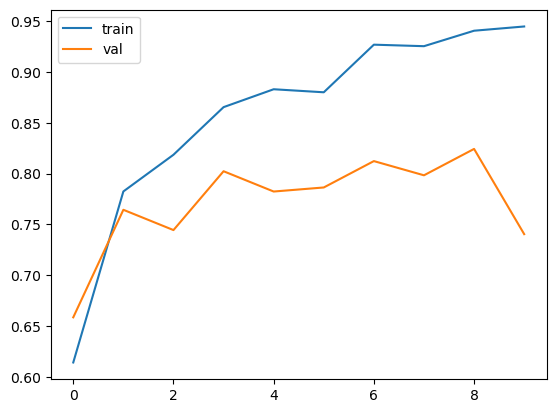

In [29]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

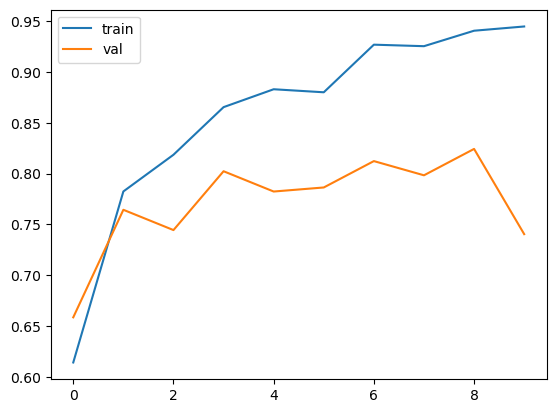

In [30]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

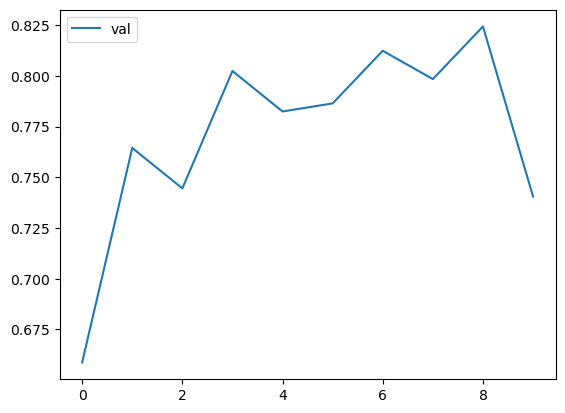

In [31]:
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

Observation: The model was able to achieve an accuracy of 80% after the 4th Epoch. The model is overfitting because it does extremely well on the training set but struggles (Hovers around 80%) on the Validation dataset

## Adjusting the learning rate
What's the learning rate
Trying different values

In [32]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(7)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [33]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
105/105 [==============================] - 253s 2s/step - loss: 1.7212 - accuracy: 0.3428 - val_loss: 1.5234 - val_accuracy: 0.4711
Epoch 2/10
105/105 [==============================] - 229s 2s/step - loss: 1.3990 - accuracy: 0.4982 - val_loss: 1.3308 - val_accuracy: 0.5489
Epoch 3/10
105/105 [==============================] - 154s 1s/step - loss: 1.2428 - accuracy: 0.5686 - val_loss: 1.2140 - val_accuracy: 0.5988
Epoch 4/10
105/105 [==============================] - 146s 1s/step - loss: 1.1448 - accuracy: 0.6092 - val_loss: 1.1344 - val_accuracy: 0.6148
Epoch 5/10
105/105 [==============================] - 154s 1s/step - loss: 1.0756 - accuracy: 0.6405 - val_loss: 1.0810 - val_accuracy: 0.6327
Epoch 6/10
105/105 [==============================] - 163s 2s/step - loss: 1.0238 - accuracy: 0.6566 - val_loss: 1.0353 - val_accuracy: 0.6407
Epoch 7/10
105/105 [==============================] - 169s 2s/step - loss: 0.9807 - accuracy: 0.6796 - val_loss: 0.9993 - val_accuracy:

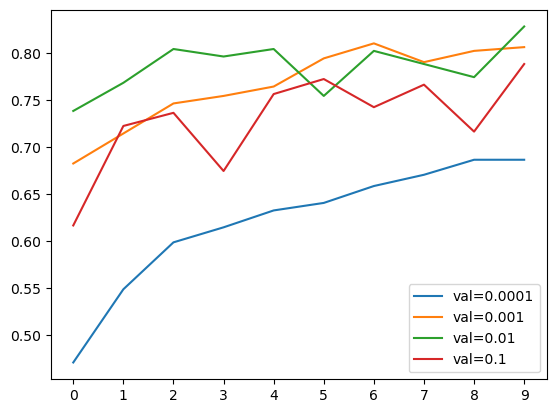

In [35]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

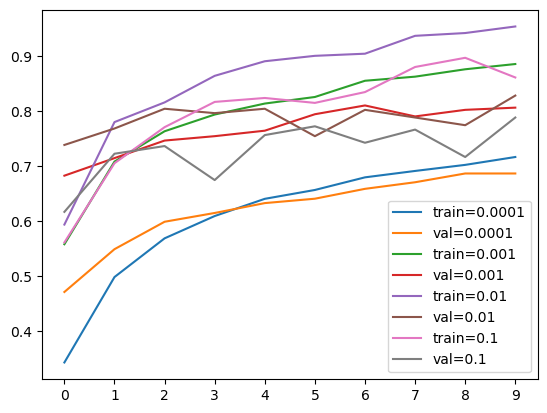

In [36]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()